In [1]:
import transformers

In [ ]:
!ls

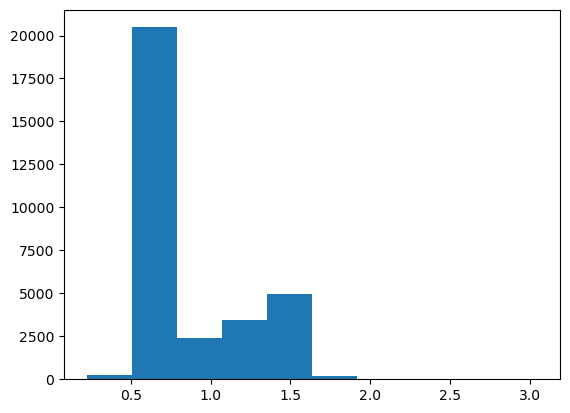

In [25]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

rt_path = "/media/tsujimura/Extreme Pro/main/555_own_project/500_workshop/05_ML_Institute_2025/04_week4/mini_projs/data/flickr30k/flickr30k-images"

file_ls = os.listdir(rt_path)

aspect_rate = []

for i in range(len(file_ls)):
    test_img = file_ls[i]
    if test_img != "readme.txt":
        img_path = os.path.join(rt_path, test_img)
        img = Image.open(img_path)
        img_np = np.array(img)
        aspect_rate.append(img_np.shape[0]/img_np.shape[1])

    # plt.imshow(img_np)
    # plt.show()

plt.hist(aspect_rate)
plt.show()

In [26]:
clip_m = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
vit_m = transformers.CLIPModel.from_pretrained("google/vit-base-patch16-224-in21k")

You are using a model of type vit to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.
Some weights of CLIPModel were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['logit_scale', 'text_model.embeddings.position_embedding.weight', 'text_model.embeddings.token_embedding.weight', 'text_model.encoder.layers.0.layer_norm1.bias', 'text_model.encoder.layers.0.layer_norm1.weight', 'text_model.encoder.layers.0.layer_norm2.bias', 'text_model.encoder.layers.0.layer_norm2.weight', 'text_model.encoder.layers.0.mlp.fc1.bias', 'text_model.encoder.layers.0.mlp.fc1.weight', 'text_model.encoder.layers.0.mlp.fc2.bias', 'text_model.encoder.layers.0.mlp.fc2.weight', 'text_model.encoder.layers.0.self_attn.k_proj.bias', 'text_model.encoder.layers.0.self_attn.k_proj.weight', 'text_model.encoder.layers.0.self_attn.out_proj.bias', 'text_model.encoder.layers.0.self_attn.out_proj.weight', 'tex

In [27]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

In [50]:
# model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt", padding=True)

In [38]:
inputs.pixel_values[0].shape

torch.Size([3, 224, 224])

In [42]:
inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [49]:
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])

In [57]:
clip_m

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [55]:
clip_m.text_model

CLIPTextTransformer(
  (embeddings): CLIPTextEmbeddings(
    (token_embedding): Embedding(49408, 512)
    (position_embedding): Embedding(77, 512)
  )
  (encoder): CLIPEncoder(
    (layers): ModuleList(
      (0-11): 12 x CLIPEncoderLayer(
        (self_attn): CLIPSdpaAttention(
          (k_proj): Linear(in_features=512, out_features=512, bias=True)
          (v_proj): Linear(in_features=512, out_features=512, bias=True)
          (q_proj): Linear(in_features=512, out_features=512, bias=True)
          (out_proj): Linear(in_features=512, out_features=512, bias=True)
        )
        (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (mlp): CLIPMLP(
          (activation_fn): QuickGELUActivation()
          (fc1): Linear(in_features=512, out_features=2048, bias=True)
          (fc2): Linear(in_features=2048, out_features=512, bias=True)
        )
        (layer_norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      )
    )
  )
  (final_layer_norm

In [56]:
clip_m.vision_model

CLIPVisionTransformer(
  (embeddings): CLIPVisionEmbeddings(
    (patch_embedding): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (position_embedding): Embedding(50, 768)
  )
  (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  (encoder): CLIPEncoder(
    (layers): ModuleList(
      (0-11): 12 x CLIPEncoderLayer(
        (self_attn): CLIPSdpaAttention(
          (k_proj): Linear(in_features=768, out_features=768, bias=True)
          (v_proj): Linear(in_features=768, out_features=768, bias=True)
          (q_proj): Linear(in_features=768, out_features=768, bias=True)
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): CLIPMLP(
          (activation_fn): QuickGELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
    

In [59]:
import torch

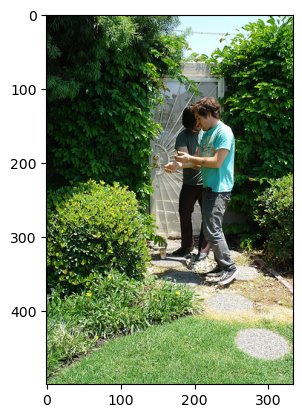

In [67]:
plt.imshow(img_np)
plt.show()

In [61]:
for i in range(len(file_ls)):
    test_img = file_ls[i]
    if test_img != "readme.txt":
        img_path = os.path.join(rt_path, test_img)
        img = Image.open(img_path)
        img_np = np.array(img)
        aspect_rate.append(img_np.shape[0]/img_np.shape[1])
        break

# Load and preprocess image
# img = Image.open("your_image.jpg")
inputs = processor(images=img, return_tensors="pt")

# Pass through vision model
with torch.no_grad():
    vision_outputs = clip_m.vision_model(**inputs)

In [66]:
vision_outputs

BaseModelOutputWithPooling(last_hidden_state=tensor([[[ 0.0430,  0.1501, -0.0281,  ...,  0.2843,  0.1738, -0.1156],
         [ 0.0453,  0.1650, -0.9513,  ...,  0.2995,  0.4402,  0.3352],
         [-0.6117,  0.0812, -0.1359,  ...,  0.2054,  0.7621,  0.5867],
         ...,
         [ 0.2487,  0.5939,  0.0409,  ...,  0.3570,  0.4247, -0.1869],
         [ 0.1576,  0.9509, -0.3967,  ...,  0.7834,  0.3923, -0.1194],
         [ 0.8091,  0.6574, -0.2994,  ...,  0.2771,  0.6909, -0.0522]]]), pooler_output=tensor([[ 3.6869e-01,  2.5491e-01,  6.0961e-02,  4.4459e-01,  1.3498e+00,
         -5.8604e-02,  1.1738e+00, -3.1482e-01,  6.1421e-01,  1.8865e-01,
         -7.1230e-02,  2.4910e-01,  2.1374e-01, -1.0039e+00,  5.2577e-01,
         -2.0739e-02,  8.3259e-01,  3.0755e-01,  1.1820e+00,  1.0194e+00,
          1.8574e+00,  4.1499e-01,  6.6626e-01,  1.7439e+00,  6.1909e-01,
          2.6974e-01,  5.5147e-01,  3.7178e-01,  7.5985e-01,  1.9834e+00,
         -9.0594e+00, -1.3382e-01, -5.6469e-01, -2.006

In [88]:
inputs = processor(text=["a photo of two men on the garden", "a photo of two boys on the garden"], return_tensors="pt", padding=True)
clip_m.text_model(**inputs).keys()

odict_keys(['last_hidden_state', 'pooler_output'])

In [ ]:
# Access as torch tensors
last_hidden_state = vision_outputs.last_hidden_state
pooler_output = vision_outputs.pooler_output

print(type(last_hidden_state))  # <class 'torch.Tensor'>
print(type(pooler_output))      # <class 'torch.Tensor'>
print(last_hidden_state.shape) 
# Shape: [batch_size, num_patches+1, hidden_dim] 
# # last_hidden_state[:, 0, :] is the embedding for the [CLS] token (often used as the image representation).
# last_hidden_state[:, 1:, :] are the embeddings for each image patch.

print(pooler_output.shape) # 


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1, 50, 768])
torch.Size([1, 768])


In [ ]:
# Access the vision model (ViT)
vision_model = model.vision_model

# Access the text (language) model (Transformer)
text_model = model.text_model

In [51]:
outputs = clip_m(**inputs)
outputs.keys()

ValueError: You have to specify input_ids

In [ ]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(text=["a photo of a cat", "a photo of a dog"], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities


In [ ]:
import transformers
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel


In [ ]:
clip_m = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
vit_m = transformers.CLIPModel.from_pretrained("google/vit-base-patch16-224-in21k")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
for i in range(len(file_ls)):
    test_img = file_ls[i]
    if test_img != "readme.txt":
        img_path = os.path.join(rt_path, test_img)
        img = Image.open(img_path)
        img_np = np.array(img)
        aspect_rate.append(img_np.shape[0]/img_np.shape[1])
        break

In [91]:
test_img

'1000092795.jpg'

In [74]:
# Load and preprocess image
# img = Image.open("your_image.jpg")
inputs = processor(images=img, return_tensors="pt")

# Pass through vision model
with torch.no_grad():
    vision_outputs = clip_m.vision_model(**inputs)

# Access as torch tensors
last_hidden_state_v = vision_outputs.last_hidden_state
pooler_output_v = vision_outputs.pooler_output

print(type(last_hidden_state_v))  # <class 'torch.Tensor'>
print(type(pooler_output_v))      # <class 'torch.Tensor'>
print(last_hidden_state_v.shape) 
# Shape: [batch_size, num_patches+1, hidden_dim] 
# # last_hidden_state[:, 0, :] is the embedding for the [CLS] token (often used as the image representation).
# last_hidden_state[:, 1:, :] are the embeddings for each image patch.

print(pooler_output_v.shape) # 

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([1, 50, 768])
torch.Size([1, 768])


In [ ]:
1000092795.jpg#0	Two young guys with shaggy hair look at their hands while hanging out in the yard .
1000092795.jpg#1	Two young , White males are outside near many bushes .
1000092795.jpg#2	Two men in green shirts are standing in a yard .
1000092795.jpg#3	A man in a blue shirt standing in a garden .
1000092795.jpg#4	Two friends enjoy time spent together .

In [98]:

inputs = processor(text=[
    "planet jupiter exploded", 
    "Two young guys with shaggy hair look at their hands while hanging out in the yard ."
    ], return_tensors="pt", padding=True)

# Pass through vision model
with torch.no_grad():
    text_outputs = clip_m.text_model(**inputs)

# Access as torch tensors
last_hidden_state_t = text_outputs.last_hidden_state
pooler_output_t = text_outputs.pooler_output

print(type(last_hidden_state_t))  # <class 'torch.Tensor'>
print(type(pooler_output_t))      # <class 'torch.Tensor'>
print(last_hidden_state_t.shape) # [batch, seq_len, d_model]
# Shape: [batch_size, num_patches+1, hidden_dim] 
# # last_hidden_state[:, 0, :] is the embedding for the [CLS] token (often used as the image representation).
# last_hidden_state[:, 1:, :] are the embeddings for each image patch.

print(pooler_output_t.shape) # 

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([2, 19, 512])
torch.Size([2, 512])


In [99]:
fin_out_v = clip_m.visual_projection(pooler_output_v)
fin_out_t = clip_m.text_projection(pooler_output_t)

print(fin_out_v.shape)
print(fin_out_t.shape)

import torch
import torch.nn.functional as F

v_norm = F.normalize(fin_out_v, p=2, dim=1)
t_norm = F.normalize(fin_out_t, p=2, dim=1)

cosine_sim = torch.mm(v_norm, t_norm.t())
cosine_dist = 1-cosine_sim
cosine_dist

torch.Size([1, 512])
torch.Size([2, 512])


tensor([[0.8219, 0.6734]], grad_fn=<RsubBackward1>)